In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    #raise NotImplementedError
    return 1/(2*len(y))*np.sum(np.square(y-tx.dot(w)))

# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    #raise NotImplementedError
    for indw0, w_0 in enumerate(w0):
        for indw1, w_1 in enumerate(w1):
            w=[w_0,w_1]
            losses[indw0, indw1] = compute_loss(y,tx,w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.019 seconds


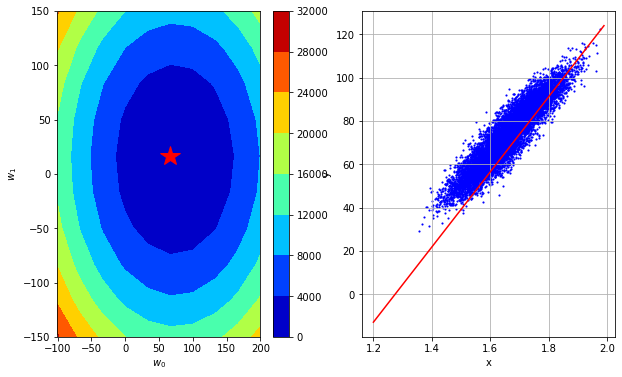

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    #raise NotImplementedError
    return -1/len(y)*tx.T.dot((y-tx.dot(w)))

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w=w-gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=265.302462108962, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=37.87837955044161, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=17.4102121201745, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450455, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638307, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887965652202, w0=73.29379216412119, w1=13.4

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [22]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    #raise NotImplementedError
    return -1/len(y)*tx.T.dot((y-tx.dot(w)))

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    #raise NotImplementedError
    w = initial_w
    ws = [initial_w]
    losses = []
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=1, shuffle=True) : 
            grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            w = w-gamma*grad
            losses.append(compute_loss(minibatch_y,minibatch_tx,w))
            ws.append(w)

    return losses, ws

In [23]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.012 seconds


In [21]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


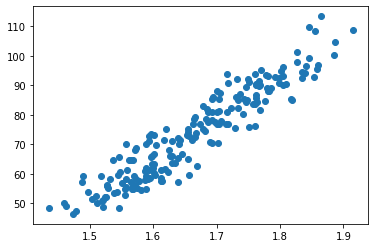

In [25]:
#Let's load the data and plot it
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
plt.scatter(height, weight)

In [28]:
#Let's find w0 and w1 value using MSE 
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2829.2722244384163, w0=51.54259072181176, w1=10.132993413506084
Gradient Descent(1/49): loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557825
Gradient Descent(2/49): loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773322
Gradient Descent(3/49): loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/49): loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/49): loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/49): loss=13.644931152102243, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/49): loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/49): loss=13.643446931881353, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/49): loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/49): loss=13.643434909697561, w0=73.63214202236942, w1=

In [29]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

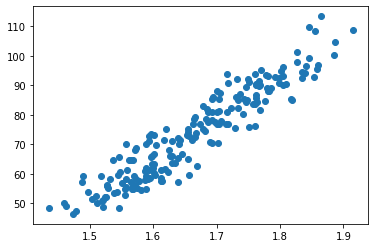

In [30]:
#Now add outliers
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
plt.scatter(height, weight)

In [31]:
#Let's find w0 and w1 value using MSE 
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2829.2722244384163, w0=51.54259072181176, w1=10.132993413506084
Gradient Descent(1/49): loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557825
Gradient Descent(2/49): loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773322
Gradient Descent(3/49): loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/49): loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/49): loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/49): loss=13.644931152102243, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/49): loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/49): loss=13.643446931881353, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/49): loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/49): loss=13.643434909697561, w0=73.63214202236942, w1=

In [32]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [33]:
def compute_loss(y, tx, w):
    """Calculate the MAE loss.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    #raise NotImplementedError
    return 1/(2*len(y))*np.sum(np.abs(y-tx.dot(w)))

In [34]:
def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    #raise NotImplementedError
    return -1/len(y)*tx.T.dot(np.sign(y-tx.dot(w)))

In [35]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_subgradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w=w-gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Sub Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [36]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Sub Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=36.81613622986557, w0=51.54259072181176, w1=10.132993413506084
Gradient Descent(1/49): loss=11.044840868959682, w0=67.0053679383553, w1=13.172891437557825
Gradient Descent(2/49): loss=3.5463101881223906, w0=71.64420110331838, w1=14.084860844773322
Gradient Descent(3/49): loss=2.2294229297350667, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/49): loss=2.1119656013109656, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/49): loss=2.106978153570885, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/49): loss=2.1086902322384438, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/49): loss=2.1093994427152265, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/49): loss=2.1096512112317596, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/49): loss=2.1097267417867194, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/49): loss=2.109749400953207, w0=73.63214202236942, w1=1

In [37]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>